In [9]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf


In [10]:
batch_size = 64
num_classes = 10
epochs = 12

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data('/home/mnist.npz')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
938/938 - 9s - loss: 0.4499 - accuracy: 0.8641 - val_loss: 0.1580 - val_accuracy: 0.9532 - 9s/epoch - 10ms/step
Epoch 2/12
938/938 - 8s - loss: 0.1381 - accuracy: 0.9597 - val_loss: 0.1068 - val_accuracy: 0.9684 - 8s/epoch - 9ms/step
Epoch 3/12
938/938 - 7s - loss: 0.1003 - accuracy: 0.9699 - val_loss: 0.0909 - val_accuracy: 0.9722 - 7s/epoch - 8ms/step
Epoch 4/12
938/938 - 8s - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0619 - val_accuracy: 0.9802 - 8s/epoch - 8ms/step
Epoch 5/12
938/938 - 8s - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.0536 - val_accuracy: 0.9826 - 8s/epoch - 8ms/step
Epoch 6/12
938/938 - 8s - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0650 - val_accuracy: 0.9784 - 8s/epoch - 8ms/step
Epoch 7/12
938/938 - 8s - loss: 0.0539 - accuracy: 0.9841 - val_loss: 0.0512 - val_accuracy: 0.9838 - 8s/epoch - 8ms/step
Epoch 8/12
938/938 - 8s - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.

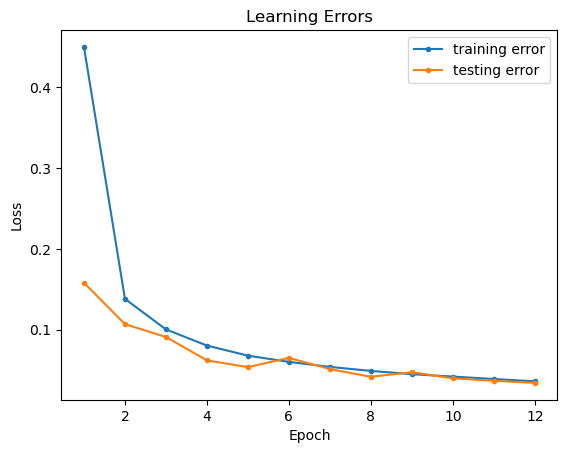

In [12]:
import matplotlib.pyplot as plt
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
num_epochs = [i+1 for i in range(epochs)]
plt.plot(num_epochs, train_loss, marker='.', label='training error')
plt.plot(num_epochs, test_loss, marker='.', label='testing error')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Learning Errors')
plt.show()